# SVM

## CON FILTRO <40

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
svc=SVC(random_state=25)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score
import pickle

In [2]:
with open("Data/train_data_40.pkl",'rb') as f:
    over_train_data_40 = pickle.load(f)

In [3]:
train_labels_40 = over_train_data_40['MVP']
train_data_40= over_train_data_40.drop('MVP', axis = 1)

In [4]:
C = uniform(loc=0, scale=1)
kernel=['linear', 'poly', 'rbf', 'sigmoid']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters_40 = {'C': C,
                 'kernel' : kernel,
                 }

In [6]:
#CAMBIARE N_ITER
# rs_40=RandomizedSearchCV(svc, rs_parameters_40, scoring=scoring, refit="roc_auc", n_jobs=-1, n_iter=10, random_state=756)
rs_40=RandomizedSearchCV(svc, rs_parameters_40, scoring="balanced_accuracy_score", n_jobs=-1, n_iter=10, random_state=756)
rs_svc_40 = rs_40.fit(train_data_40, train_labels_40)

In [7]:
print("The best score is",rs_svc_40.best_score_)
print("The best parameters are", rs_svc_40.best_params_)

The best score is 0.999441527233891
The best parameters are {'C': 0.9490440415330578, 'kernel': 'rbf'}


ORFEO OUTPUT:

The best score is 0.9960091086458718
The best parameters are {'C': 0.23927052879924482, 'kernel': 'linear'}

In [9]:
svc_final_40=SVC(C=0.4369,kernel='linear', class_weight="balanced",probability=True,  max_iter=10000, random_state=13)
# svc_final_40=SVC(C=0.23927,kernel='linear', class_weight="balanced", probability=True max_iter=10000, random_state=13)

svc_final_40.fit(train_data_40, train_labels_40)

with open("svm_40.pkl",'wb') as f:
    pickle.dump(svc_final_40,f)

In [5]:
with open("Data/test_data_40.pkl",'rb') as f:
    test_data_40 = pickle.load(f)

test_labels_40 = test_data_40["MVP"]
test_data_40=test_data_40.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

In [6]:
pred_svc_40 = svc_final_40.predict(test_data_40)
print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_labels_40,pred_svc_40)}")

The accuracy of the Logistic Regressor is  0.9962370649106302


In [7]:
confusion_matrix(test_labels_40,pred_svc_40)

array([[1056,    2],
       [   2,    3]])

In [8]:
print(classification_report(test_labels_40,pred_svc_40))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1058
         1.0       0.60      0.60      0.60         5

    accuracy                           1.00      1063
   macro avg       0.80      0.80      0.80      1063
weighted avg       1.00      1.00      1.00      1063



## SENZA FILTRO <40

Train data ha 0.30

In [3]:
with open("Data/train_data.pkl",'rb') as f:
    over_train_data = pickle.load(f)

In [4]:
train_labels = over_train_data['MVP']
train_data= over_train_data.drop('MVP', axis = 1)

In [22]:
C = uniform(loc=0, scale=1)
kernel=['linear', 'poly', 'rbf', 'sigmoid']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters = {'C': C,
                 'kernel' : kernel,
                 }

In [23]:

rs = RandomizedSearchCV(svc, rs_parameters_40, scoring="balanced_accuracy", n_jobs=-1, n_iter=250, random_state=756)

rs_svc = rs.fit(train_data, train_labels)

In [24]:
print("The best score is",rs_svc.best_score_)
print("The best parameters are", rs_svc.best_params_)

The best score is 0.9986645718774548
The best parameters are {'C': 0.5974544330105953, 'kernel': 'linear'}


ORFEO OUTPUT

The best score is 0.9976698215555226
The best parameters are {'C': 0.43687812798961845, 'kernel': 'linear'}

In [5]:
# svc_final=SVC(C=0.4369,kernel='linear', class_weight="balanced", probability=True, max_iter=10000, random_state=13) #with 0.2 test
svc_final=SVC(C=0.597454,kernel='linear', class_weight="balanced", probability=True, max_iter=10000, random_state=13) #with 0.3 test

svc_final.fit(train_data, train_labels)

with open("svm.pkl",'wb') as f:
    pickle.dump(svc_final,f)

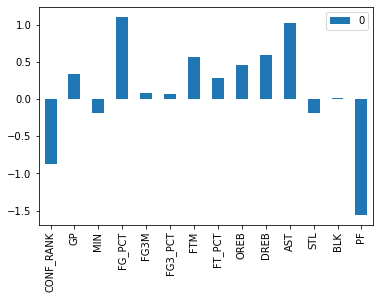

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
importance_log_reg = svc_final.coef_[0]
a = pd.DataFrame(data=importance_log_reg, index=train_data.columns)

a.plot(kind="bar")
plt.savefig('plot/svm_importance.png', bbox_inches='tight')

In [26]:
with open("Data/test_data.pkl",'rb') as f:
    test_data = pickle.load(f)

test_labels = test_data["MVP"]
test_data=test_data.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

In [27]:
pred_svc = svc_final.predict(test_data)
print(f"The balanced accuracy of the Logistic Regressor is  {balanced_accuracy_score(test_labels,pred_svc)}")

The balanced accuracy of the Logistic Regressor is  0.8996335654085745


In [28]:
confusion_matrix(test_labels,pred_svc)

array([[2727,    2],
       [   1,    4]])

In [29]:
print(classification_report(test_labels,pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2729
         1.0       0.67      0.80      0.73         5

    accuracy                           1.00      2734
   macro avg       0.83      0.90      0.86      2734
weighted avg       1.00      1.00      1.00      2734



## Senza feature selection (no Pearson correlation)

In [14]:
with open("Data/train_data_no_pearson.pkl",'rb') as f:
    over_train_data = pickle.load(f)

In [15]:
train_labels = over_train_data['MVP']
train_data= over_train_data.drop('MVP', axis = 1)

In [5]:
C = uniform(loc=0, scale=1)
kernel=['linear', 'poly', 'rbf', 'sigmoid']
scoring = ['precision', 'f1', 'roc_auc']

rs_parameters = {'C': C,
                 'kernel' : kernel,
                 }

In [6]:

rs=RandomizedSearchCV(svc, rs_parameters, scoring=scoring, refit="roc_auc", n_jobs=-1, n_iter=10, random_state=756)
rs_svc = rs.fit(train_data, train_labels)

In [7]:
print("The best score is",rs_svc.best_score_)
print("The best parameters are", rs_svc.best_params_)

The best score is 0.9994782593598162
The best parameters are {'C': 0.9490440415330578, 'kernel': 'rbf'}


ORFEO OUTPUT

The best score is 0.9976698215555226
The best parameters are {'C': 0.43687812798961845, 'kernel': 'linear'}

In [16]:
svc_final=SVC(C=0.9490440415330578,kernel='rbf', class_weight="balanced", probability=True, max_iter=10000, random_state=13)

svc_final.fit(train_data, train_labels)

with open("svm_no_pearson.pkl",'wb') as f:
    pickle.dump(svc_final,f)

In [9]:
with open("Data/test_data_no_pearson.pkl",'rb') as f:
    test_data = pickle.load(f)

test_labels = test_data["MVP"]
test_data=test_data.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID", "MVP"], axis=1)

In [10]:
pred_svc = svc_final.predict(test_data)
print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_labels,pred_svc)}")

The accuracy of the Logistic Regressor is  0.9972572682391662


In [11]:
confusion_matrix(test_labels,pred_svc)

array([[1815,    3],
       [   2,    3]])

In [12]:
print(classification_report(test_labels,pred_svc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1818
         1.0       0.50      0.60      0.55         5

    accuracy                           1.00      1823
   macro avg       0.75      0.80      0.77      1823
weighted avg       1.00      1.00      1.00      1823

